In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

from PIL import Image, ImageOps

import shutil

In [2]:
df = pd.read_csv("data/pokemon.csv")
df

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [24]:
df["image_name"] = df["Name"] + ".png"

In [26]:
df.columns = df.columns.str.lower()

In [27]:
df

,name,type1,type2,image_name
0,bulbasaur,Grass,Poison,bulbasaur.png
1,ivysaur,Grass,Poison,ivysaur.png
2,venusaur,Grass,Poison,venusaur.png
3,charmander,Fire,NaN,charmander.png
4,charmeleon,Fire,NaN,charmeleon.png
...,...,...,...,...
804,stakataka,Rock,Steel,stakataka.png
805,blacephalon,Fire,Ghost,blacephalon.png
806,zeraora,Electric,NaN,zeraora.png
807,meltan,Steel,NaN,meltan.png


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    809 non-null    object
 1   Type1   809 non-null    object
 2   Type2   405 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


In [4]:
df["Type1"].value_counts()

Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: Type1, dtype: int64

In [5]:
df["Type2"].value_counts()

Flying      95
Poison      32
Ground      32
Fairy       29
Psychic     29
Fighting    25
Steel       23
Grass       19
Dragon      18
Water       17
Dark        17
Ghost       16
Rock        14
Fire        11
Ice         11
Electric     8
Bug          5
Normal       4
Name: Type2, dtype: int64

In [6]:
labels = df['Type1'].unique().tolist()

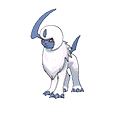

In [7]:
# create a for loop to pull out all images

absol = Image.open("data/images/absol.png")
absol

In [8]:
absol_array = np.array(absol)
absol_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
flattened_input = np.ravel(absol_array)
len(flattened_input)

14400

In [10]:
image_list = []
for images in os.listdir("data/images/"):
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        image_list.append(images)

In [11]:
image_list

['parasect.png',
 'lumineon.png',
 'raikou.png',
 'comfey.jpg',
 'dedenne.png',
 'pyroar.png',
 'articuno.png',
 'magmortar.png',
 'bulbasaur.png',
 'banette.png',
 'staraptor.png',
 'pidove.png',
 'taillow.png',
 'charizard.png',
 'infernape.png',
 'sandshrew.png',
 'alakazam.png',
 'lickitung.png',
 'starmie.png',
 'yanmega.png',
 'yveltal.png',
 'zigzagoon.png',
 'thundurus-incarnate.png',
 'petilil.png',
 'torterra.png',
 'purugly.png',
 'cresselia.png',
 'regigigas.png',
 'palkia.png',
 'marshadow.jpg',
 'froakie.png',
 'munna.png',
 'bellossom.png',
 'gabite.png',
 'mareep.png',
 'tapu-koko.jpg',
 'shieldon.png',
 'stoutland.png',
 'accelgor.png',
 'makuhita.png',
 'seviper.png',
 'tirtouga.png',
 'lampent.png',
 'tornadus-incarnate.png',
 'nidoking.png',
 'huntail.png',
 'nosepass.png',
 'carracosta.png',
 'nidoqueen.png',
 'inkay.png',
 'archeops.png',
 'avalugg.png',
 'sentret.png',
 'golbat.png',
 'skorupi.png',
 'yungoos.jpg',
 'conkeldurr.png',
 'jellicent.png',
 'meltan.jp

In [12]:
df["Name"]

0        bulbasaur
1          ivysaur
2         venusaur
3       charmander
4       charmeleon
          ...     
804      stakataka
805    blacephalon
806        zeraora
807         meltan
808       melmetal
Name: Name, Length: 809, dtype: object

In [13]:
array_list=[]
for imagetag in image_list:
    a = np.ravel(np.array(Image.open(f"data/images/{imagetag}")))
    array_list.append(a)

In [14]:
array_list

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 

In [15]:
array_dict = dict(zip(image_list, array_list))

In [16]:
array_dict

{'parasect.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'lumineon.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'raikou.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'comfey.jpg': array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 'dedenne.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'pyroar.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'articuno.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'magmortar.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'bulbasaur.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'banette.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'staraptor.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'pidove.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'taillow.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'charizard.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'infernape.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'sandshrew.png': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 

In [17]:
#pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import splitfolders

In [23]:
#splitfolders.ratio('data', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [29]:
df

,name,type1,type2,image_name
0,bulbasaur,Grass,Poison,bulbasaur.png
1,ivysaur,Grass,Poison,ivysaur.png
2,venusaur,Grass,Poison,venusaur.png
3,charmander,Fire,NaN,charmander.png
4,charmeleon,Fire,NaN,charmeleon.png
...,...,...,...,...
804,stakataka,Rock,Steel,stakataka.png
805,blacephalon,Fire,Ghost,blacephalon.png
806,zeraora,Electric,NaN,zeraora.png
807,meltan,Steel,NaN,meltan.png


In [ ]:
df["split"] = np.nan


In [34]:
train_list = []
for image in os.listdir("output/train/images"):
    train_list.append(image)

In [37]:
test_list = []
for image in os.listdir("output/test/images"):
    test_list.append(image)

In [36]:
val_list = []
for image in os.listdir("output/val/images"):
    val_list.append(image)

In [44]:
train_list

['parasect.png',
 'lumineon.png',
 'raikou.png',
 'dedenne.png',
 'pyroar.png',
 'articuno.png',
 'banette.png',
 'staraptor.png',
 'pidove.png',
 'comfey.png',
 'taillow.png',
 'charizard.png',
 'infernape.png',
 'marshadow.png',
 'alakazam.png',
 'lickitung.png',
 'starmie.png',
 'yanmega.png',
 'zigzagoon.png',
 'thundurus-incarnate.png',
 'torterra.png',
 'purugly.png',
 'cresselia.png',
 'regigigas.png',
 'palkia.png',
 'froakie.png',
 'munna.png',
 'bellossom.png',
 'gabite.png',
 'shieldon.png',
 'stoutland.png',
 'accelgor.png',
 'makuhita.png',
 'seviper.png',
 'tornadus-incarnate.png',
 'huntail.png',
 'nosepass.png',
 'carracosta.png',
 'nidoqueen.png',
 'inkay.png',
 'archeops.png',
 'avalugg.png',
 'grubbin.png',
 'sentret.png',
 'skorupi.png',
 'hoopa-confined.png',
 'yungoos.png',
 'meltan.png',
 'meloetta-aria.png',
 'luxio.png',
 'binacle.png',
 'galvantula.png',
 'crawdaunt.png',
 'hippopotas.png',
 'swirlix.png',
 'finneon.png',
 'medicham.png',
 'poliwrath.png',
 'm

In [45]:
for index, row in df.iterrows():
    if row["image_name"] in train_list:
        row["split"] = "train"

In [47]:
df["split"].value_counts()

Series([], Name: split, dtype: int64)

In [55]:
for index, row in df.iterrows():
    if row["image_name"] in train_list:
        row["split"] = "train"
    elif row["image_name"] in test_list:
        row["split"] = "test"
    else:
        row["split"] = "val"

In [56]:
df

,name,type1,type2,image_name,split
0,bulbasaur,Grass,Poison,bulbasaur.png,NaN
1,ivysaur,Grass,Poison,ivysaur.png,NaN
2,venusaur,Grass,Poison,venusaur.png,NaN
3,charmander,Fire,NaN,charmander.png,NaN
4,charmeleon,Fire,NaN,charmeleon.png,NaN
...,...,...,...,...,...
804,stakataka,Rock,Steel,stakataka.png,NaN
805,blacephalon,Fire,Ghost,blacephalon.png,NaN
806,zeraora,Electric,NaN,zeraora.png,NaN
807,meltan,Steel,NaN,meltan.png,NaN


In [60]:
train_df = df.loc[df.apply(lambda row: row["image_name"] in train_list, axis=1)]
test_df = df.loc[df.apply(lambda row: row["image_name"] in test_list, axis=1)]
val_df = df.loc[df.apply(lambda row: row["image_name"] in val_list, axis=1)]

In [61]:
train_df["split"] = "train"
test_df["split"] = "test"
val_df["split"] = "val"

/var/folders/x7/5j65n6x57hq9g5yst5z9k1m00000gn/T/ipykernel_14043/3637238151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["split"] = "train"
/var/folders/x7/5j65n6x57hq9g5yst5z9k1m00000gn/T/ipykernel_14043/3637238151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["split"] = "test"
/var/folders/x7/5j65n6x57hq9g5yst5z9k1m00000gn/T/ipykernel_14043/3637238151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [74]:
df = pd.concat([train_df, test_df])

In [75]:
df = pd.concat([df, val_df])

In [76]:
df["split"].sort_values()

24     test
178    test
193    test
194    test
212    test
       ... 
177     val
159     val
156     val
326     val
808     val
Name: split, Length: 809, dtype: object

In [101]:
train_dir = 'output/train/images'
test_dir = 'output/test/images'
val_dir = 'output/val/images'

#for index, row in df.iterrows():
    class_label = row['type1']  
    filename = row['image_name']  
    if class_label not in os.listdir(train_dir):
        os.mkdir(os.path.join(train_dir, class_label))
    if class_label not in os.listdir(test_dir):
        os.mkdir(os.path.join(test_dir, class_label))
    if class_label not in os.listdir(val_dir):
        os.mkdir(os.path.join(val_dir, class_label))       
    if row['split'] == 'train':
        shutil.move(os.path.join(train_dir, filename), os.path.join(train_dir, class_label, filename))
    elif row['split'] == 'test':
        shutil.move(os.path.join(test_dir, filename), os.path.join(test_dir, class_label, filename))
    elif row['split'] == 'val':
        shutil.move(os.path.join(val_dir, filename), os.path.join(val_dir, class_label, filename))

IndentationError: unexpected indent (2060044804.py, line 6)

In [78]:
df = df.sort_index()

In [ ]:
image_data(train_list, )

In [94]:
train_list[0]

'parasect.png'

In [95]:
df["name"]

0        bulbasaur
1          ivysaur
2         venusaur
3       charmander
4       charmeleon
          ...     
804      stakataka
805    blacephalon
806        zeraora
807         meltan
808       melmetal
Name: name, Length: 809, dtype: object

In [100]:
df.loc[df["image_name"] == train_list[0]]

,name,type1,type2,image_name,split
46,parasect,Bug,Grass,parasect.png,train


In [91]:
image_data(train_list, 'output/train/images')

FileNotFoundError: [Errno 2] No such file or directory: '..parasect.png'

In [ ]:
def image_data(data_path):
    for image in df
    b = Image.open(f"{data_path}/)

In [84]:
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [85]:
train = get_data('output/train/images')
test = get_data('output/test/images')

name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'img_size' is not defined
name 'im

TypeError: Image data of dtype <U1 cannot be converted to float

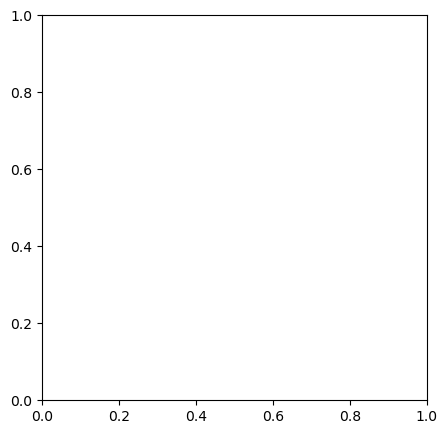

In [82]:
plt.figure(figsize = (5,5))
plt.imshow(train_list[1][0])
plt.title(labels[train_list[0][1]])

In [151]:
def image_data(image_list, image_path):
    array_list=[]
    for i in range(len(image_list)):
        image_label = (df.loc[df["image_name"] == image_list[i], "type1"]).values[0]
        a = np.ravel(np.array(Image.open(f"{image_path}/{image_label}/{imagetag}")))
        array_list.append(a)
    return array_list

In [152]:
image_data(train_list, 'output/train/images')

FileNotFoundError: [Errno 2] No such file or directory: 'output/train/images/Bug/ekans.png'

In [122]:
(df.loc[df["image_name"] == train_list[1]])["type1"]

456    Water
Name: type1, dtype: object

In [123]:
(df.loc[df["image_name"] == train_list[10]])["type1"]

275    Normal
Name: type1, dtype: object

In [128]:
for image in train_list:
    print(image)

parasect.png
lumineon.png
raikou.png
dedenne.png
pyroar.png
articuno.png
banette.png
staraptor.png
pidove.png
comfey.png
taillow.png
charizard.png
infernape.png
marshadow.png
alakazam.png
lickitung.png
starmie.png
yanmega.png
zigzagoon.png
thundurus-incarnate.png
torterra.png
purugly.png
cresselia.png
regigigas.png
palkia.png
froakie.png
munna.png
bellossom.png
gabite.png
shieldon.png
stoutland.png
accelgor.png
makuhita.png
seviper.png
tornadus-incarnate.png
huntail.png
nosepass.png
carracosta.png
nidoqueen.png
inkay.png
archeops.png
avalugg.png
grubbin.png
sentret.png
skorupi.png
hoopa-confined.png
yungoos.png
meltan.png
meloetta-aria.png
luxio.png
binacle.png
galvantula.png
crawdaunt.png
hippopotas.png
swirlix.png
finneon.png
medicham.png
poliwrath.png
magnemite.png
florges.png
serperior.png
budew.png
shellos.png
keldeo-ordinary.png
porygon.png
alomomola.png
electrike.png
dratini.png
mienfoo.png
reshiram.png
sawsbuck.png
lycanroc-midday.png
flareon.png
gliscor.png
darmanitan-standard

In [127]:
df.loc[lambda df: df['type1'] == "Bug"]

,name,type1,type2,image_name,split
9,caterpie,Bug,NaN,caterpie.png,train
10,metapod,Bug,NaN,metapod.png,test
11,butterfree,Bug,Flying,butterfree.png,train
12,weedle,Bug,Poison,weedle.png,val
13,kakuna,Bug,Poison,kakuna.png,train
...,...,...,...,...,...
742,ribombee,Bug,Fairy,ribombee.png,train
766,wimpod,Bug,Water,wimpod.png,train
767,golisopod,Bug,Water,golisopod.png,val
793,buzzwole,Bug,Fighting,buzzwole.png,train


In [ ]:
df.loc[[]]

In [143]:
type_list1 = []
for image in range(len(train_list)):
    type_list1.append((df.loc[df["image_name"] == train_list[image], "type1"]).values[0])

In [145]:
type_list1

['Bug',
 'Water',
 'Electric',
 'Electric',
 'Fire',
 'Ice',
 'Ghost',
 'Normal',
 'Normal',
 'Fairy',
 'Normal',
 'Fire',
 'Fire',
 'Fighting',
 'Psychic',
 'Normal',
 'Water',
 'Bug',
 'Normal',
 'Electric',
 'Grass',
 'Normal',
 'Psychic',
 'Normal',
 'Water',
 'Water',
 'Psychic',
 'Grass',
 'Dragon',
 'Rock',
 'Normal',
 'Bug',
 'Fighting',
 'Poison',
 'Flying',
 'Water',
 'Rock',
 'Water',
 'Poison',
 'Dark',
 'Rock',
 'Ice',
 'Bug',
 'Normal',
 'Poison',
 'Psychic',
 'Normal',
 'Steel',
 'Normal',
 'Electric',
 'Rock',
 'Bug',
 'Water',
 'Ground',
 'Fairy',
 'Water',
 'Fighting',
 'Water',
 'Electric',
 'Fairy',
 'Grass',
 'Grass',
 'Water',
 'Water',
 'Normal',
 'Water',
 'Electric',
 'Dragon',
 'Fighting',
 'Dragon',
 'Normal',
 'Rock',
 'Fire',
 'Ground',
 'Fire',
 'Bug',
 'Fire',
 'Grass',
 'Water',
 'Ground',
 'Poison',
 'Fire',
 'Normal',
 'Fighting',
 'Normal',
 'Bug',
 'Psychic',
 'Fighting',
 'Water',
 'Rock',
 'Bug',
 'Psychic',
 'Dark',
 'Normal',
 'Dragon',
 'Bug',
 

In [141]:
(df.loc[df["image_name"] == train_list[1], "type1"]).values[0]

'Water'